<img src="https://rhyme.com/assets/img/logo-dark.png" align="center">

<h2 align="center"> Univariate Linear Regression </h2>

### By Chinelo Cynthia Ezenwafor 

. Implement the Gradient Descent algorithm from scratch

. Perform Univariate linear regression with Numpy an Python

. Use Linear regression to predict profits in each city for a bike company

 ### Load the Data and Libraries
---

In [1]:
# importing the required libraries
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
#reading the dataset to a dataframe
df = pd.read_csv("food_truck_data.txt")
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
# see a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


> The dataset consists of two columns; Population and Profit with 97 entries. There are no null values

### Visualize the Data
---

The correlation (r) between profit and Population is 0.837873232526341


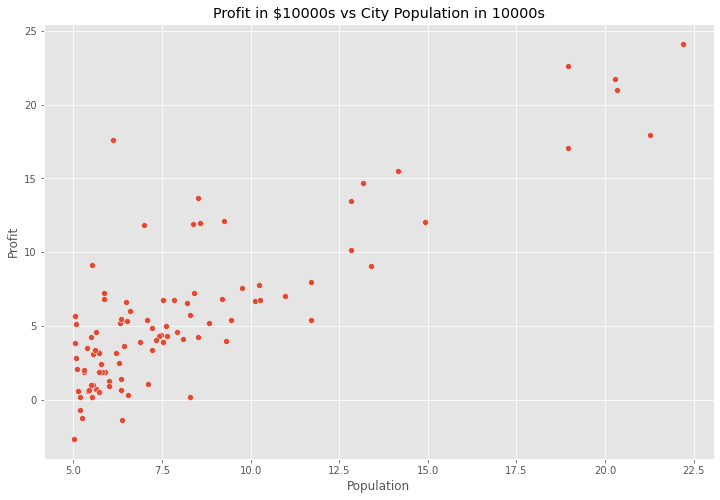

In [5]:
# plot a scatter plot of the data with population on the x-axis and profit on the y-axis
ax = sns.scatterplot(x='Population', y='Profit', data=df)
ax.set_title("Profit in $10000s vs City Population in 10000s");
print('The correlation (r) between profit and Population is ' + str(df['Profit'].corr(df['Population'])))

> From the scatter plot, a strong positive relationship (0.837873232526341) can be seen between profit and population. This means that as population increases, there is a high probabilty of increase in profit.

### Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [6]:
def cost_function(x, y, theta):
    '''
       The function 'cost_function' takes three arguments: x, y, and theta.
       x is the input data, typically represented as a matrix where each row represents a different example and each column represents a different feature.
       y is the output or target values corresponding to each example in x.
       theta is a vector of parameters or weights for the linear regression model.
    '''
    m = len(y)
    y_pred = x.dot(theta)
    error = (y_pred - y)** 2
    return 1/(2 * m) * np.sum (error)

> The cost function returns the mean squared error (MSE), which is calculated by taking the sum of all the squared errors, dividing it by twice the number of examples (2 * m), and returning the result. The division by 2 * m is to normalize the cost and ensure it represents the average error per example.

In [7]:
m = df.Population.values.size
# add another dimension to accomodate the intercept term and set it to all ones
x = np.append(np.ones((m, 1)), df.Population.values.reshape(m, 1), axis=1)
y = df.Profit.values.reshape(m, 1)
#initialize the theta function to all zeros
theta = np.zeros((2,1))

# call the function
cost_function(x, y, theta)

32.072733877455676

> The cost function ($J(\theta)$) or Mean squared error is 32.072733877455676

### Using the Gradient Descent algorithm to minimize the cost function 
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [8]:
def gradient_descent(x, y, theta, alpha, iterations):
    '''
        The function 'gradient_descent' takes five arguments: x, y, theta, alpha, and iterations.
        x is the input data matrix, typically represented as a matrix where each row represents a different example and each column represents a different feature.
        y is the output or target values corresponding to each example in x.
        theta is a vector of parameters or weights for the linear regression model.
        alpha is the learning rate, which controls the step size during each iteration of gradient descent.
        iterations is the number of iterations or steps to perform during the gradient descent optimization.
    '''
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = x.dot(theta)
        error = np.dot(x.transpose(), (y_pred - y))
        theta -= alpha * 1/m * error
        costs.append(cost_function(x, y, theta))
    return theta, costs

# the function returns the updated parameter vector theta and the list costs containing the cost function values at each iteration.

In [9]:
theta, costs = gradient_descent(x, y, theta, alpha=0.01, iterations=2000)

print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)),
                                str(round(theta[1, 0], 2))))

h(x) = -3.79 + 1.18x1


> The linear regression equation is h(x) = -3.79 + 1.18x1 where $\Theta_0$ is -3.79 and $\Theta_1$ is 1.18

In [10]:
costs[910]

4.530719360142383

> The cost function at the 910th iteration is 4.530719360142383.

### Visualising the Cost Function $J(\theta)$
---

In [11]:
from mpl_toolkits.mplot3d import Axes3D

In [12]:
theta_0 = np.linspace(-10,10,100)
theta_1 = np.linspace(-1,4,100)
# theta_0 and theta_1 ranges are from the linear regression equation above

# initialise a 2D array for cost values filled with zeroes to store the cost function values for different combinations of theta_0 and theta_1.
cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(x, y, t)
       

> This calculates the cost function value for the current values of theta_0 and theta_1 using the cost_function function, and stores it in the corresponding element of the cost_values array.This generates a 2D array of the $J(\Theta)$

C:\Users\User\AppData\Local\Temp\ipykernel_4688\3877576642.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(surf, shrink=0.5, aspect=5)


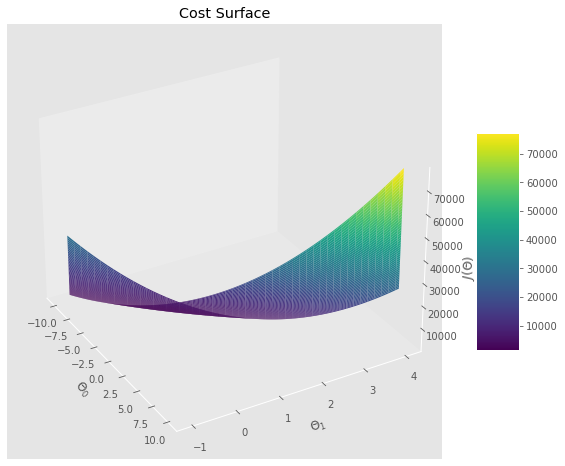

In [13]:
# plotting the 2D array of the cost function

fig = plt.figure(figsize = (12, 8))
ax = plt.axes(projection = '3d')
ax.grid(False)

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = "viridis", linewidth = 0.2)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.set_title("Cost Surface")
ax.view_init(30,330)

plt.show()

> The gradient descent plot shows how the cost function kept on changing iteratively until it gets smaller and converges at the minimum value. This helps in understanding the optimization process.

### Plotting the Convergence
---

> Plot $J(\theta)$ against the number of iterations of gradient descent:

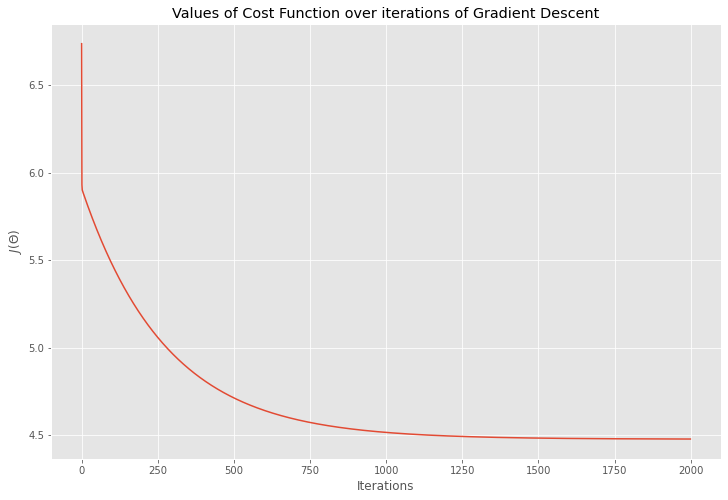

In [14]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

> From the plot, the value of $J(\Theta)$ kept on changing(decreasing) via each iteration step as it approaches the convergence(global minimum). 

### Training Data with Linear Regression Fit
---

In [15]:
print(theta.shape)
theta

(2, 1)


array([[-3.78806857],
       [ 1.18221277]])

C:\Users\User\New folder\ANACONDA3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


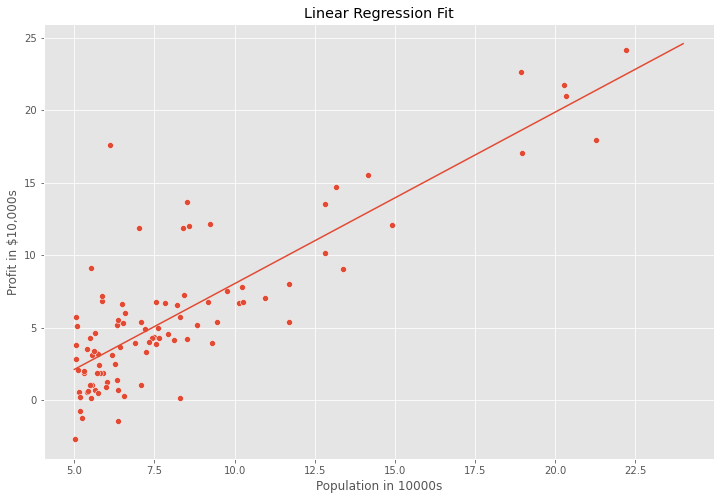

In [16]:
theta = np.squeeze(theta)
sns.scatterplot(x = "Population", y= "Profit", data = df)

x_value=[x for x in range(5, 25)]
y_value=[(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value,y_value)

plt.xlabel("Population in 10000s")
plt.ylabel("Profit in $10,000s")
plt.title("Linear Regression Fit");

### Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$

In [17]:
def predict(x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

In [18]:
y_pred_1 = predict(np.array([1, 4]),theta) * 10000
print("For a population of 40,000, the model predicts a profit of $" + str(round(y_pred_1, 0)))

For a population of 40,000, the model predicts a profit of $9408.0


In [19]:
y_pred_1 = predict(np.array([1, 8.3]),theta) * 10000
print("For a population of 83,000, the model predicts a profit of $" + str(round(y_pred_1, 0)))

For a population of 83,000, the model predicts a profit of $60243.0
